In [2]:
import numpy as np
from scipy import constants as cons
from numpy import pi, cos, sin, sqrt
# import PyGnuplot as gp
import matplotlib.pyplot as plt

In [3]:
plt.ion()

In [4]:
def get_LogNegNum(CovM_in):
    CovM = CovM_in * 2
    V = np.linalg.det(CovM)
    A = np.linalg.det(CovM[:2, :2])
    B = np.linalg.det(CovM[2:, 2:])
    C = np.linalg.det(CovM[:2, 2:])
    sigma = A + B - 2.0 * C
    vn = sqrt(sigma / 2.0 - sqrt(sigma * sigma - 4.0 * V) / 2.0)
    if C == 0:
        return 0.0
    else:
        return -np.log2(2.0 * vn) if (np.log2(2.0 * vn)) < 0.0 else 0.0

In [5]:
def N_test(n12, nth=0.0):
    M_test = np.array([[(0.25+(n12+nth)/2.0), 0, sqrt(n12)/2.0, 0],
                       [0, (0.25 + (n12+nth)/2.0), 0, -sqrt(n12)/2.0],
                       [sqrt(n12)/2.0, 0, (0.25+(n12+nth)/2.0), 0],
                       [0, -sqrt(n12)/2.0, 0, (0.25+(n12+nth) / 2.0)]])
    N = get_LogNegNum(M_test)
    return N

In [6]:
def get_LogN_M(n1, n2, q):
    '''Returns a Covariance Matrix and its corresponding log negativity,
    '''
    M_test = np.array([[n1 / 2.0, 0, q / 2.0, 0],
                       [0, n1 / 2.0, 0, -q / 2.0],
                       [q / 2.0, 0, n2 / 2.0, 0],
                       [0, -q /2.0, 0, n2 / 2.0]])
    N = get_LogNegNum(M_test)
    return M_test, N

In [7]:
def get_Ef(N):
    dn = 2**N
    cp = (dn**(-0.5) + dn**(0.5))**2 / 4
    cn = (dn**(-0.5) - dn**(0.5))**2 / 4
    Ef = cp * np.log2(cp) - cn * np.log2(cn)
    return Ef

In [8]:
def get_q(sqdb):
    '''convert squeezing db to photon numbers with reference to vacuum'''
    sqf = 10**(sqdb/10)
    Q = (sqf*0.5-0.5)
    return Q

In [9]:
def get_Ebit(sqdb, bw=1, th=0):
    '''squeezing in db sqdb, bandwidth bw, total thermal photons (equal contr) th'''
    sq = get_q(sqdb)
    M, N = get_LogN_M(0.5+th/2, 0.5+th/2, sq)
    ef = get_Ef(N)
    print('LogNeg: '+str(N))
    print('Ef: '+str(ef))
    print('Ebits: '+str(bw*ef/1e6)+ ' Mebit/s')

### Plot thermal photons v.s. freq.  
$$n = \dfrac{1}{\exp^{h f/ k_b T} -1}$$

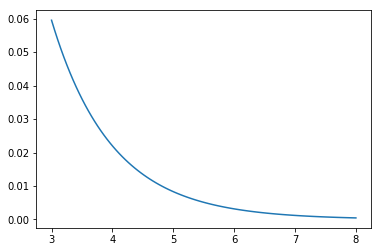

In [9]:
T = 0.050
f = np.linspace(3e9,8e9, 100)
n = 1/(np.exp((cons.Planck*f)/(cons.Boltzmann*T))-1)
plt.plot(f/1e9,n)

### Plot  Log Negativity v.s. squeezing for different number of thermal photons

In [10]:
def plot_LogN_vs_SQ(th=0, sqmax=-20, pts=201):
    sq_test = np.linspace(sqmax, 0, pts)
    sq = get_q(sq_test)
    Ns = np.zeros(pts)
    for i, sqval in enumerate(sq):
        M, Ns[i] = get_LogN_M(0.5+th/2, 0.5+th/2, sqval)
    plt.plot(sq_test, Ns)


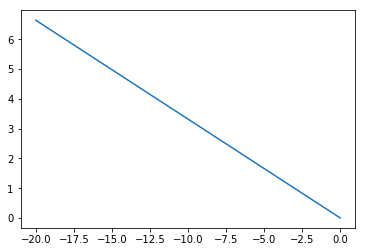

In [11]:
plot_LogN_vs_SQ(th=0.0)  # Without thermal photons

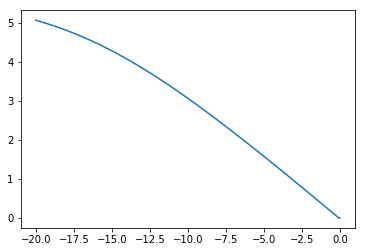

In [12]:
plot_LogN_vs_SQ(th=0.02)  # With thermal photons (0.02 @ 50mK & 4GHz)

## 1: Finite-time quantum correlations of propagating squeezed microwaves
#### Kirill G. Fedorov et. al.  ; arXiv:1703.05138v2 https://arxiv.org/abs/1703.05138v2

    Quoted Squeezing: -7.2 dB !
    Quoted Negativity: 3.5
    Maximum possible bandwidth: 5 MHz
    
    On Nature comms after asking:
    "bandwidth Δf (which corresponds to Nk ≃ 1.08 and S ≃ 5.3 dB), 
    we arrive at the entangled-bit rate of 4.3 Mebits/s"

In [18]:
get_Ebit(-5.3, bw=3.5e6, th=0.0)  # Assuming PERFECT SYSTEM

LogNeg: 1.7606218902903008
Ef: 1.2455756476675672
Ebits: 4.359514766836485 Mebit/s


## 2: Observation of Two-Mode Squeezing in the Microwave Frequency Domain
#### C. Eichler, et. al.,  http://dx.doi.org/10.1103/PhysRevLett.107.113601
    Quoted Squeezing: -2.25 (max) (excluding thermal photons)
    Max. possible Bandwidth: 14 MHz

In [19]:
get_Ebit(-2.25, bw=14e6, th=0.0) # Assuming PERFECT SYSTEM

LogNeg: 0.7474338213496565
Ef: 0.3675373924147415
Ebits: 5.1455234938063805 Mebit/s


## 3: Generating Entangled Microwave Radiation Over Two Transmission Lines (PRL 2012)
#### E. Flurin et. al.

    Quoted Ebit at sample: 6 Mebit/s
    Quoted Squeezing: -3.4 dB
    Quoted Negativity: 1.15 
    Quoted EF = 0.69
    est. Bandwidth = (6e6/0.69) = 8.7 MHz

In [14]:
get_Ebit(-3.452, bw=8.7e6, th=0.0) # Assuming PERFECT SYSTEM

LogNeg: 1.1467295783551175
Ef: 0.6896498003350491
Ebits: 5.999953262914927 Mebit/s


## 4: Path Entanglement of Continuous-Variable Quantum Microwaves
#### E. P. Menzel, et.al. ; http://dx.doi.org/10.1103/PhysRevLett.109.250502

    Quoted Squeezing: -3.2 dB
    Quoted Negativity: 0.55
    assumed Bandwidth: 10 MHz 
    (JPA with +10dB gain likely 1-2MHz Bandwidth)

In [59]:
get_Ebit(-3.2, bw=10e6, th=0.0) # Assuming PERFECT SYSTEM

LogNeg: 1.0630169903639557
Ef: 0.6185863502492333
Ebits: 6.1858635024923325 Mebit/s


In [60]:
get_Ebit(-3.2, bw=10e6, th=0.02) # Including thermal photons 40 mK (paper states 50 mK)

LogNeg: 1.0039581427948239
Ef: 0.5694289974121798
Ebits: 5.694289974121798 Mebit/s


## 5:  Generating and verifying entangled itinerant microwave fields with efficient and independent measurements
#### H. S. Ku, et al ;    http://dx.doi.org/10.1103/PhysRevA.91.042305
    Quoted negativity: 0.0824
    Quoted squeezing: -0.86 dB
    Quoted thermal photons + losses: n1 = 0.13
    Bandwidth: 8.5 MHz
    (losses result in approx factor of ~2.4 lower squeezing values)

In [17]:
get_Ebit(-0.86, bw=8.5e6, th=0.13) # Including noise and losses

LogNeg: 0.0734668157112417
Ef: 0.007803222523269688
Ebits: 0.06632739144779236 Mebit/s


In [18]:
get_Ebit(-0.86*2.4, bw=8.5e6, th=0.0) # Estimated without noise and losses

LogNeg: 0.6856459587847517
Ef: 0.32236925671148653
Ebits: 2.740138682047635 Mebit/s


## Let's compare this with our results:
    Ebits: 5 Mebit/s (including losses and th noise)
    Ebits: 90 Mebit/s (excl losses)

In [33]:
get_Ebit(-0.03011*3, bw=4e9/1.33, th=0)  # At sample output inc. Thermal photons (excl. losses)

LogNeg: 0.030006976481117453
Ef: 0.001580957920608764
Ebits: 4.754760663485005 Mebit/s


## Ebit comparison at the sample:
        1: 4.3 Mebit/s  ; Bandwidth: 5 MHz
        2: 5.14 Mebit/s ; Bandwidth: 14 MHz
        3: 6 Mebit/s    ; Bandwidth: 8.7 Mhz
        4: 5.7 Mebit/s  ; Bandwidth: 10 MHz
        5: 2.7 Mebit/s  ; Bandwidth: 8.5 MHz
        Paper: 90 Mebit/s ; Bandwidth: 8 GHz
    